In [1]:
from smartpath_libraries.enhancer import Enhancer
import yaml
import torch
import os
from glob import glob
from skimage import io, img_as_uint
from smartpath_libraries.lsm_utils import compute_norm_range

In [2]:
config = yaml.load(open("config.yaml", "r"), Loader=yaml.FullLoader)

In [3]:
model_config = config['model_config']
enhancer = Enhancer(model_config, scale_factor=model_config['up-scale-factor'], perceptual_loss=True, adversarial_loss=True)

In [4]:
enhancer.backbone.load_state_dict(torch.load(os.path.join('weights', 'enhancer.pth')))

<All keys matched successfully>

In [5]:
img_arr = io.imread('test_input_raw.tif')
img_out = enhancer.compute(img_arr)

In [6]:
import matplotlib.pyplot as plt

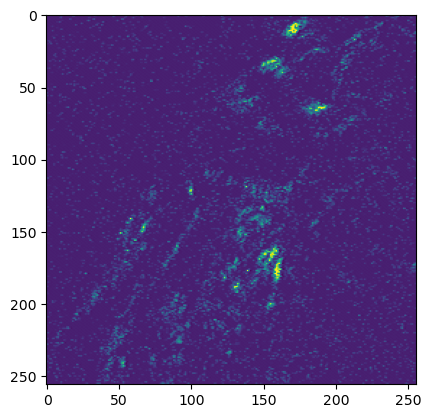

In [7]:
plt.imshow(img_arr)

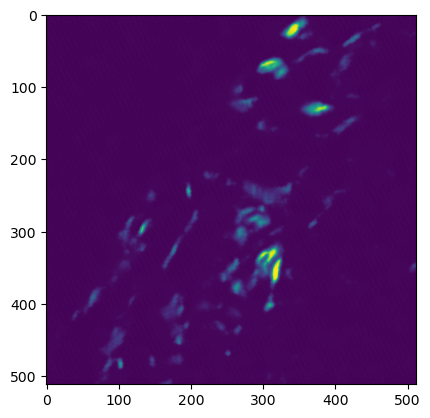

In [8]:
plt.imshow(img_out)

In [9]:
int_out = img_as_uint(img_out)

In [11]:
int_out.max()

64880